In [1]:
# Configuracion para recargar módulos y librerías 
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Imágenes: Copyright a autores respectivos.
# Gráficos: Tomados de http://matplotlib.org/gallery.html y modificados.

# MAT281

## Aplicaciones de la Matemática en la Ingeniería

Puedes ejecutar este jupyter notebook de manera interactiva:

[![Binder](../shared/images/jupyter_binder.png)](https://mybinder.org/v2/gh/sebastiandres/mat281_m03_visualizacion/master?filepath=02_teoria_visualizacion/02_teoria_visualizacion.ipynb)

[![Colab](../shared/images/jupyter_colab.png)](https://colab.research.google.com/github/sebastiandres/mat281_m03_visualizacion/blob/master//02_teoria_visualizacion/02_teoria_visualizacion.ipynb)

## ¿Qué contenido aprenderemos?

*** Visualización ***

## ¿Porqué aprenderemos sobre visualización?

* Porque un resultado no sirve si no puede comunicarse correctamente.
* Porque una buena visualización dista de ser una tarea trivial.
* Porque un ingenierio necesita producir excelentes gráficos (pero nadie enseña cómo).

Seguramente está exagerando...

## No, no exagero...
<img src="images/Fox1.png" alt="" width="600" align="middle"/>

## No, no exagero...
<img src="images/Fox2.png" alt="" width="600" align="middle"/>

## No, no exagero...
<img src="images/Fox3.png" alt="" width="600" align="middle"/>

## Primeras visualizaciones
Campaña de Napoleón a Moscú (Charles Minard, 1889).
<img src="images/Napoleon.png" alt="" width="600" align="middle"/>

## Primeras visualizaciones
Mapa del cólera (Jhon Snow, 1855).
<img src="images/Colera.png" alt="" width="600" align="middle"/>

## ¿Y en primer lugar, porqué utilizamos gráficos?

¿Porqué utilizamos gráficos para presentar datos?
* El 70 % de los receptores sensoriales del cuerpo humano está dedicado a la visión.
* Cerebro ha sido entrenado evolutivamente para interpretar la información visual.

    “The eye and the visual cortex of the brain form a massively
    parallel processor that provides the highest bandwidth channel
    into human cognitive centers”
    — Colin Ware, Information Visualization, 2004.

## Ejemplo clásico: Cuarteto de ANSCOMBE 

Considere los siguientes 4 conjuntos de datos. 

¿Qué puede decir de los datos?

In [3]:
import pandas as pd
import os
filepath = os.path.join("data","anscombe.csv")
df = pd.read_csv(filepath)
df

,x1,y1,x2,y2,x3,y3,x4,y4
0,10,8.04,10,9.14,10,7.46,8,6.58
1,8,6.95,8,8.14,8,6.77,8,5.76
2,13,7.58,13,8.74,13,12.74,8,7.71
3,9,8.81,9,8.77,9,7.11,8,8.84
4,11,8.33,11,9.26,11,7.81,8,8.47
5,14,9.96,14,8.10,14,8.84,8,7.04
6,6,7.24,6,6.13,6,6.08,8,5.25
7,4,4.26,4,3.10,4,5.39,19,12.50
8,12,10.84,12,9.13,12,8.15,8,5.56
9,7,4.82,7,7.26,7,6.42,8,7.91


In [6]:
df[sorted(df.columns)].describe(include="all")

,x1,x2,x3,x4,y1,y2,y3,y4
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,9.000000,9.000000,9.000000,9.000000,7.500909,7.500909,7.500000,7.500909
std,3.316625,3.316625,3.316625,3.316625,2.031568,2.031657,2.030424,2.030579
min,4.000000,4.000000,4.000000,8.000000,4.260000,3.100000,5.390000,5.250000
25%,6.500000,6.500000,6.500000,8.000000,6.315000,6.695000,6.250000,6.170000
50%,9.000000,9.000000,9.000000,8.000000,7.580000,8.140000,7.110000,7.040000
75%,11.500000,11.500000,11.500000,8.000000,8.570000,8.950000,7.980000,8.190000
max,14.000000,14.000000,14.000000,19.000000,10.840000,9.260000,12.740000,12.500000


## Ejemplo clásico: Cuarteto de ANSCOMBE 

Consideremos las estadísticas de los datos, versión `numpy` puro:

In [21]:
import numpy as np
data = np.loadtxt("data/anscombe.csv", delimiter=",", skiprows=1)
for i in range(4):
    x = data[:,2*i]
    y = data[:,2*i+1]
    slope, intercept = np.polyfit(x, y, 1)
    print("Grupo %d:" %(i+1))
    print("\tTiene pendiente m=%.2f e intercepto b=%.2f" %(slope, intercept))

Grupo 1:
	Tiene pendiente m=0.50 e intercepto b=3.00
Grupo 2:
	Tiene pendiente m=0.50 e intercepto b=3.00
Grupo 3:
	Tiene pendiente m=0.50 e intercepto b=3.00
Grupo 4:
	Tiene pendiente m=0.50 e intercepto b=3.00


Ahora utilizando `pandas`.

In [25]:
import pandas as pd
import os
filepath = os.path.join("data","anscombe.csv")
df = pd.read_csv(filepath)
df[sorted(df.columns)].describe(include="all")

,x1,x2,x3,x4,y1,y2,y3,y4
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,9.000000,9.000000,9.000000,9.000000,7.500909,7.500909,7.500000,7.500909
std,3.316625,3.316625,3.316625,3.316625,2.031568,2.031657,2.030424,2.030579
min,4.000000,4.000000,4.000000,8.000000,4.260000,3.100000,5.390000,5.250000
25%,6.500000,6.500000,6.500000,8.000000,6.315000,6.695000,6.250000,6.170000
50%,9.000000,9.000000,9.000000,8.000000,7.580000,8.140000,7.110000,7.040000
75%,11.500000,11.500000,11.500000,8.000000,8.570000,8.950000,7.980000,8.190000
max,14.000000,14.000000,14.000000,19.000000,10.840000,9.260000,12.740000,12.500000


## Ejemplo clásico: Cuarteto de ANSCOMBE 

Grafiquemos los datos, con `numpy`:

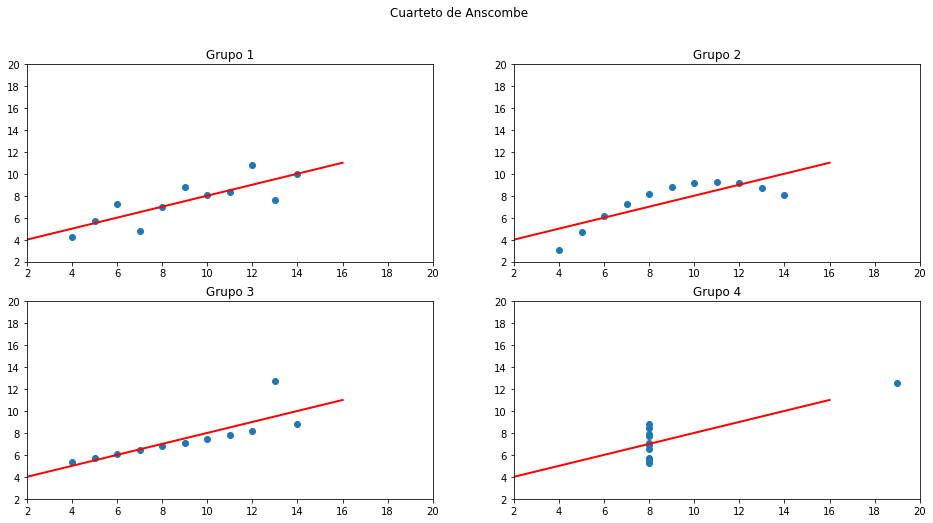

In [24]:
from matplotlib import pyplot as plt
import numpy as np

data = np.loadtxt("data/anscombe.csv", delimiter=",", skiprows=1)
fig = plt.figure(figsize=(16,8))
for i in range(4):
    x = data[:,2*i]
    y = data[:,2*i+1]
    plt.subplot(2, 2, i+1)
    plt.plot(x,y,'o')
    plt.xlim([2,20])
    plt.ylim([2,20])
    plt.title("Grupo %d" %(i+1))
    m, b = np.polyfit(x, y, 1)
    x_aux = np.linspace(2,16,20)
    plt.plot(x_aux, m*x_aux + b, 'r', lw=2.0)
plt.suptitle("Cuarteto de Anscombe")
plt.show()

Grafiquemos con `pandas`:

In [31]:
import pandas as pd
import os
# Formateo de la información
filepath = os.path.join("data","anscombe.csv")
df = pd.read_csv(filepath)
long_format_data = []
for i in range(1,5):
    old_cols = ["x{}".format(i), "y{}".format(i)]
    new_cols = ["x", "y"]
    df_aux = df[old_cols].rename(columns = dict(zip(old_cols, new_cols)))
    df_aux["set"] = "{}".format(i)
    long_format_data.append(df_aux)
df_new = pd.concat(long_format_data)
df_new

,x,y,set
0,10,8.04,1
1,8,6.95,1
2,13,7.58,1
3,9,8.81,1
4,11,8.33,1
5,14,9.96,1
6,6,7.24,1
7,4,4.26,1
8,12,10.84,1
9,7,4.82,1


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2647926cc0>],
      dtype=object)

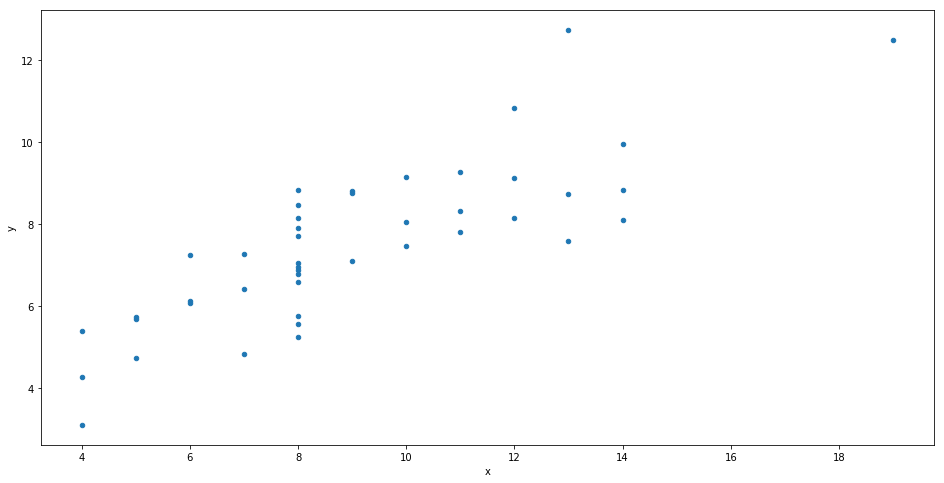

In [43]:
df_new.plot(x="x", y="y", kind="scatter", subplots=True, figsize=(16,8))

Uuuffff. Más dificil de lo pensado. 

En realidad, siempre conviene usar la mejor herramienta a mano (y conocer varias herramientas).

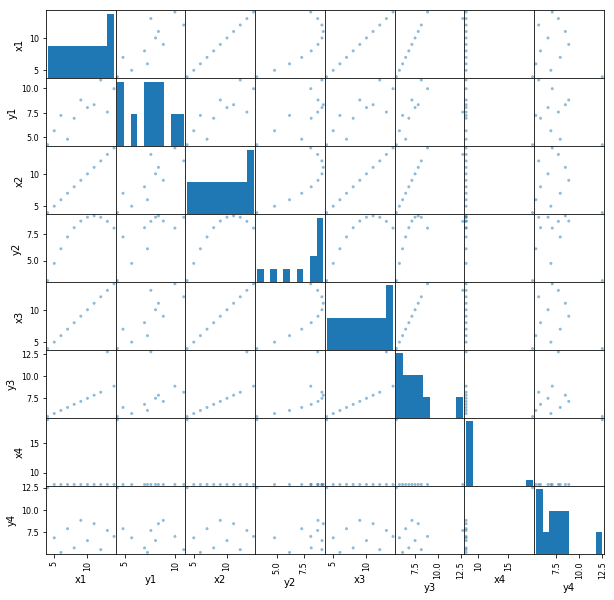

In [49]:
pd.plotting.scatter_matrix(df, figsize=(10,10));

##  Sistema visual humano

#### Buenas noticias
* Gráficos entregan información que la estadística podría no revelar.
* Despliegue visual es esencial para comprensión. 

#### Malas noticias 
* La atención es selectiva y puede ser fácilmente engañada.

#### La atención es selectiva y puede ser fácilmente engañada.
<img src="images/IO1a.png" alt="" width="400" align="middle"/>   

#### La atención es selectiva y puede ser fácilmente engañada.
<img src="images/IO1b.png" alt="" width="400" align="middle"/>   

#### La atención es selectiva y puede ser fácilmente engañada.
<img src="images/IO2a.png" alt="" width="400" align="middle"/>   

#### La atención es selectiva y puede ser fácilmente engañada.
<img src="images/IO2b.png" alt="" width="400" align="middle"/>   

## Consejos generales

Noah Illinsky, en su charla "Cuatro pilatres de la visualización" ([es](https://www.youtube.com/watch?v=nC92wIzpQFE), [en](https://www.youtube.com/watch?v=3eZ15VplE3o)), presenta buenos consejos sobre cómo realizar una correcta visualización:
* Propósito
* Información/Contenido
* Codificación/Estructura
* Formato

Es altamente aconsejable ver el video, pero en resumen:

* **Propósito** o público tiene que ver con para quién se está preparando la viz y que utilidad se le dará. Es muy diferente preparar un gráfico orientado a información y toma de decisiones.
* **Información/Contenido** se refiere a contar con la información que se desea mostrar, en el formato necesario para su procesamiento.
* **Codificación/Estructura** tiene que ver con la selección correcta de la codificación y estructura de la información.
* **Formato** tiene que ver con la elección de fuentes, colores, tamaños relativos, etc.

Lo anterior indica que una visualización no es el resultado de unos datos. Una visualización se diseña, se piensa, y luego se buscan fuentes de información apropiadas.

## Elementos para la creación de una buena visualización
1. ***Honestidad***: representaciones visuales no deben engañar al observador.
2. ***Priorización***: dato más importante debe utilizar elemento de mejor percepción.
3. ***Expresividad***: datos deben utilizar elementos con atribuciones adecuadas.
4. ***Consistencia***: codificación visual debe permitir reproducir datos.

El principio básico a respetar es que a partir del gráfico uno debe poder reobtener fácilmente los datos originales.

## 1. Honestidad
El ojo humano no tiene la misma precisión al estimar distintas atribuciones:
* **Largo**: Bien estimado y sin sesgo, con un factor multiplicativo de 0.9 a 1.1.
* **Área**: Subestimado y con sesgo, con un factor multiplicativo de 0.6 a 0.9.
* **Volumen**: Muy subestimado y con sesgo, con un factor multiplicativo de 0.5 a 0.8.

#### 1. Honestidad
Resulta inadecuado realizar gráficos de datos utilizando áreas o volúmenes buscando inducir a errores.
<img src="images/Honestidad1.png" alt="" width="400" align="middle"/>

#### 1. Honestidad
Resulta inadecuado realizar gráficos de datos utilizando áreas o volúmenes si no queda claro la atribución utilizada.
<img src="images/Honestidad2.png" alt="" width="400" align="middle"/>

#### 1. Honestidad
Una pseudo-excepción la constituyen los "pie-chart" o gráficos circulares,
porque el ojo humano distingue bien ángulos y segmentos de círculo,
y porque es posible indicar los porcentajes respectivos.

In [ ]:
from matplotlib import pyplot as plt
# make a square figure and axes
plt.figure(figsize=(6,6))
ax = plt.axes([0.1, 0.1, 0.8, 0.8])

# The slices will be ordered and plotted counter-clockwise.
my_labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
my_fracs = [15, 30, 45, 10]
my_explode=(0, 0.10, 0.10, 0)

#plt.pie(my_fracs, labels=my_labels)
plt.pie(my_fracs, explode=my_explode, labels=my_labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Raining Hogs and Dogs', bbox={'facecolor':'0.8', 'pad':5})
plt.show()

 Sin embargo, en general los pie-chart no tienen buena fama y conviene evitarlos. Un pie-chart nunca debiera tener más de 3 categorías, en cuyo caso las cantidades podrían compararse con gráficos de barras.
 

## 2. Priorización
Dato más importante debe utilizar elemento de mejor percepción.

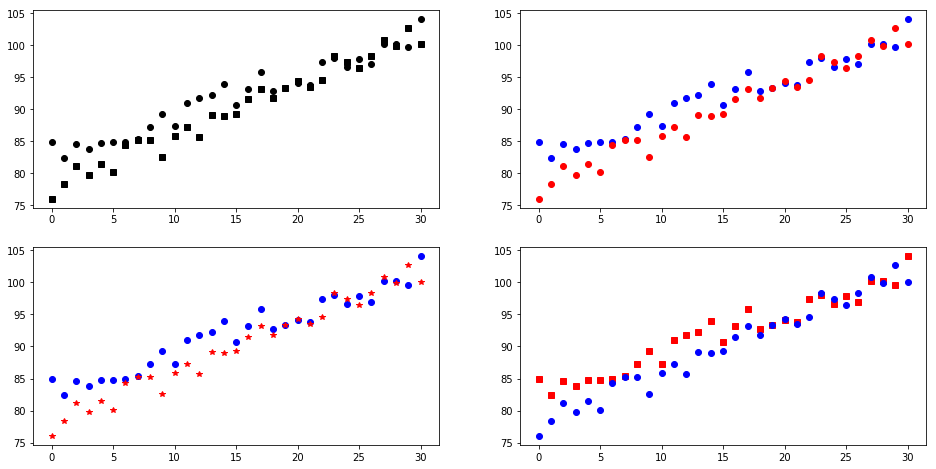

In [50]:
import numpy as np
from matplotlib import pyplot as plt
N = 31
x = np.arange(N)
y1 = 80 + 20*x/N + 5*np.random.rand(N)
y2 = 75 + 25*x/N + 5*np.random.rand(N)
fig = plt.figure(figsize=(16,8))
plt.subplot(2, 2, 1)
plt.plot(x, y1, 'ok')
plt.plot(x, y2, 'sk')
plt.subplot(2, 2, 2)
plt.plot(x, y1,'ob')
plt.plot(x, y2,'or')
plt.subplot(2, 2, 3)
plt.plot(x, y1,'ob')
plt.plot(x, y2,'*r')
plt.subplot(2, 2, 4)
plt.plot(x, y1,'sr')
plt.plot(x, y2,'ob')
plt.show()

#### 2. Priorización
## Elementos de mejor percepción
No todos los elementos tienen la misma percepción a nivel del sistema visual.

En particular, el color y la forma son elementos preatentivos: un color distinto o una forma distinta se reconocen de manera no conciente.

<img src="images/preatentivo1.png" alt="" width="400" align="middle"/>

<img src="images/preatentivo2.png" alt="" width="400" align="middle"/>

#### 2. Priorización
## Elementos de mejor percepción
¿En que orden creen que el sistema visual humano puede estimar los siguientes atributos visuales:
* Color
* Pendiente
* Largo
* Ángulo
* Posición
* Área
* Volumen

#### 2. Priorización
## Elementos de mejor percepción
El sistema visual humano puede estimar con precisión siguientes atributos visuales:
1. Posición
2. Largo
3. Pendiente
4. Ángulo
5. Área
6. Volumen
7. Color

Utilice el atributo que se estima con mayor precisión cuando sea posible.

#### 2. Priorización
## Colormaps
Puesto que la percepción del color tiene muy baja precisión, resulta ***inadecuado*** tratar de representar un valor numérico con colores.
* ¿Qué diferencia numérica existe entre el verde y el rojo?
* ¿Que asociación preexistente posee el color rojo, el amarillo y el verde?
* ¿Con cuánta precisión podemos distinguir valores en una escala de grises?

#### 2. Priorización
## Colormaps
<img src="images/colormap.png" alt="" width="400" align="middle"/>

#### 2. Priorización
## Colormaps
Algunos ejemplos de colormaps

/home/sebastiandres/miniconda3/envs/mat281_modulo3/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  # This is added back by InteractiveShellApp.init_path()
/home/sebastiandres/miniconda3/envs/mat281_modulo3/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  if sys.path[0] == '':


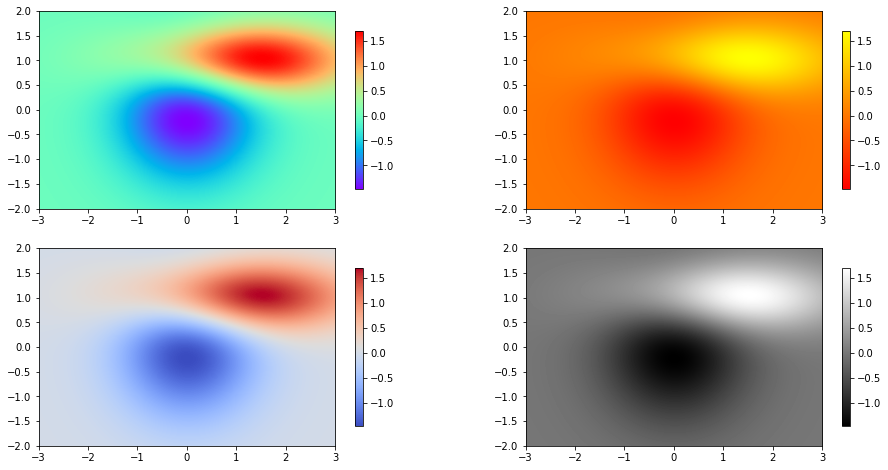

In [51]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
# difference of Gaussians
Z = 10.0 * (Z2 - Z1)

plt.figure(figsize=(16,8))
# First plot
plt.subplot(2,2,1)
im = plt.imshow(Z, interpolation='bilinear', origin='lower',cmap=cm.rainbow, extent=(-3, 3, -2, 2))
plt.colorbar(im, shrink=0.8)
# Second plot
plt.subplot(2,2,2)
im = plt.imshow(Z, interpolation='bilinear', origin='lower',cmap=cm.autumn, extent=(-3, 3, -2, 2))
plt.colorbar(im, shrink=0.8)
# Third plot
plt.subplot(2,2,3)
im = plt.imshow(Z, interpolation='bilinear', origin='lower',cmap=cm.coolwarm, extent=(-3, 3, -2, 2))
plt.colorbar(im, shrink=0.8)
# Fourth plot
plt.subplot(2,2,4)
im = plt.imshow(Z, interpolation='bilinear', origin='lower',cmap=cm.gray, extent=(-3, 3, -2, 2))
plt.colorbar(im, shrink=0.8)
# Show
plt.show()

#### 2. Priorización
## Colormaps
Consejo: evite mientras pueda los colormaps. Por ejemplo, utilizando contour plots.

/home/sebastiandres/miniconda3/envs/mat281_modulo3/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  # This is added back by InteractiveShellApp.init_path()
/home/sebastiandres/miniconda3/envs/mat281_modulo3/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  if sys.path[0] == '':
/home/sebastiandres/miniconda3/envs/mat281_modulo3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


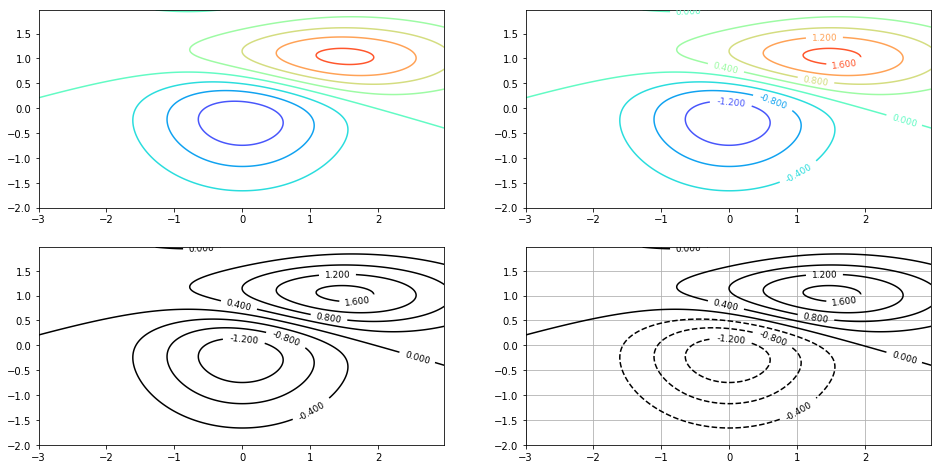

In [52]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
# difference of Gaussians
Z = 10.0 * (Z2 - Z1)

plt.figure(figsize=(16,8))
# First plot
plt.subplot(2,2,1)
CS = plt.contour(X, Y, Z, 9, cmap=cm.rainbow)
# Second plot
matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
plt.subplot(2,2,2)
CS = plt.contour(X, Y, Z, 9, cmap=cm.rainbow)
plt.clabel(CS, fontsize=9, inline=1)
# Third plot
matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
plt.subplot(2,2,3)
CS = plt.contour(X, Y, Z, 9, colors='k')
plt.clabel(CS, fontsize=9, inline=1)
# Fourth plot
matplotlib.rcParams['contour.negative_linestyle'] = 'dashed'
plt.subplot(2,2,4)
CS = plt.contour(X, Y, Z, 9, colors='k')
plt.clabel(CS, fontsize=9, inline=1)
plt.grid('on')
# Show
plt.show()

## 3. Sobre la Expresividad
Mostrar los datos y sólo los datos. 

Los datos deben utilizar elementos con atribuciones adecuadas: Not all data is born equal.

#### 3. Sobre la Expresividad
Clasificación de datos:
* ***Datos Cuantitativos***: Cuantificación absoluta.
  * Cantidad de azúcar en fruta: 50 [gr/kg]
  * Operaciones =, $\neq$, <, >, +, −, * , /
* ***Datos Posicionales***: Cuantificación relativa.
  * Fecha de cosecha: 1 Agosto 2014, 2 Agosto 2014.
  * Operaciones =, $\neq$, <, >, +, −
* ***Datos Ordinales***: Orden sin cuantificación.
  * Calidad de la Fruta: baja, media, alta, exportación.
  * Operaciones =, $\neq$, <, >
* ***Datos Nominales***: Nombres o clasificaciones
  * Frutas: manzana, pera, kiwi, ...
  * Operaciones $=$, $\neq$

#### 3. Sobre la Expresividad
Ejemplo: Planilla de datos sobre terremotos.
* Ciudad más próxima
* Año
* Magnitud en escala Richter
* Magnitud en escala Mercalli
* Latitud 
* Longitud

#### 3. Sobre la Expresividad
Contraejemplo: Compañias de computadores.

| Companía | Procedencia |
|----------|-------------|
| MSI  | Taiwan |
| Asus | Taiwan |
| Acer | Taiwan |
| HP | EEUU |
| Dell | EEUU |
| Apple | EEUU |
| Sony | Japon |
| Toshiba | Japon |
| Lenovo | Hong Kong |
| Samsung | Corea del Sur |


#### 3. Sobre la Expresividad
Contraejemplo: Compañias de computadores.

[0 1 2 3 4 5 6 7 8 9]
[1 1 1 2 2 2 3 3 4 7]


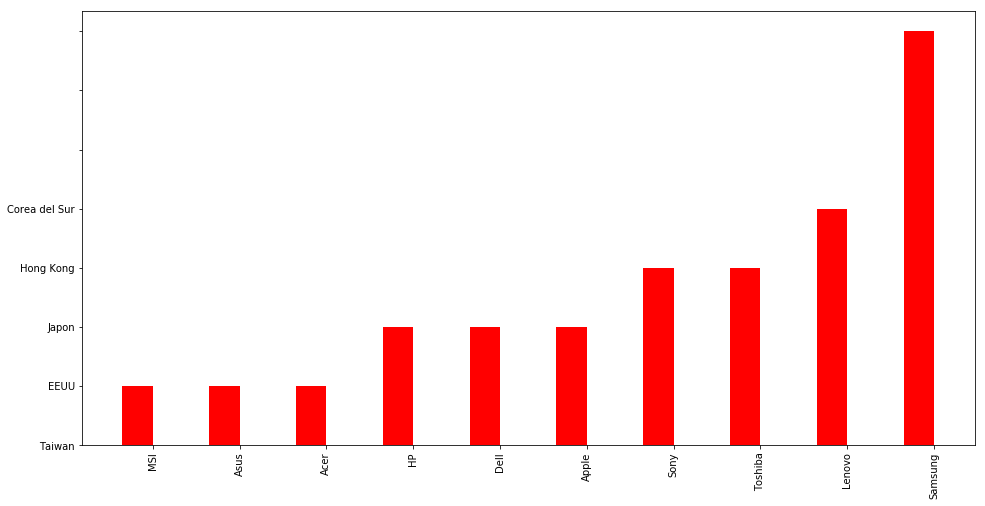

In [60]:
import matplotlib.pyplot as plt
import numpy as np
brands = {"MSI":"Taiwan", "Asus":"Taiwan", "Acer":"Taiwan", 
          "HP":"EEUU", "Dell":"EEUU", "Apple":"EEUU", 
          "Sony":"Japon", "Toshiba":"Japon", 
          "Lenovo":"Hong Kong", 
          "Samsung":"Corea del Sur"}
C2N = {"Taiwan":1,"EEUU":2,"Japon":3,"Hong Kong":4,"Corea del Sur":7}
x = np.arange(len(brands.keys()))
y = np.array([C2N[val] for key,val in brands.items()])
width = 0.35       # the width of the bars
fig, ax = plt.subplots(figsize=(16,8))
print(x)
print(y)
rects1 = ax.bar(x, y, width, color='r')

# add some text for labels, title and axes ticks
ax.set_xticks(x + 0.5*width)
ax.set_xticklabels(brands.keys(), rotation="90")
#ax.set_yticks(C2N.values())
ax.set_yticklabels(C2N.keys())
#plt.xlim([-1,len(x)+1])
#plt.ylim([-1,y.max()+1])
plt.show()

#### 3. Sobre la Expresividad
Clasificación de datos:
* ***Datos Cuantitativos***: Cuantificación absoluta.
  * Cantidad de azúcar en fruta: 50 [gr/kg]
  * Operaciones =, $\neq$, <, >, +, −, * , /
    * **Utilizar posición, largo, pendiente o ángulo**  
* ***Datos Posicionales***: Cuantificación relativa.
  * Fecha de cosecha: 1 Agosto 2014, 2 Agosto 2014.
  * Operaciones =, $\neq$, <, >, +, −
    * **Utilizar posición, largo, pendiente o ángulo**
* ***Datos Ordinales***: Orden sin cuantificación.
  * Calidad de la Fruta: baja, media, alta, exportaci on.
  * Operaciones =, $\neq$, <, >
    * **Utilizar marcadores diferenciados en forma o tamaño, o mapa de colores apropiado**
* ***Datos Nominales***: Nombres o clasificaciones
  * Frutas: manzana, pera, kiwi, ...
  * Operaciones $=$, $\neq$
    * **Utilizar forma o color **


## 4. Consistencia
La codificación visual debe permitir reproducir datos. Para ello debemos:
* Graficar datos que sean comparables.
* Utilizar ejes escalados adecuadamente.
* Utilizar la misma codificación visual entre gráficos similares.

#### 4. Consistencia
## Utilizar ejes escalados adecuadamente.

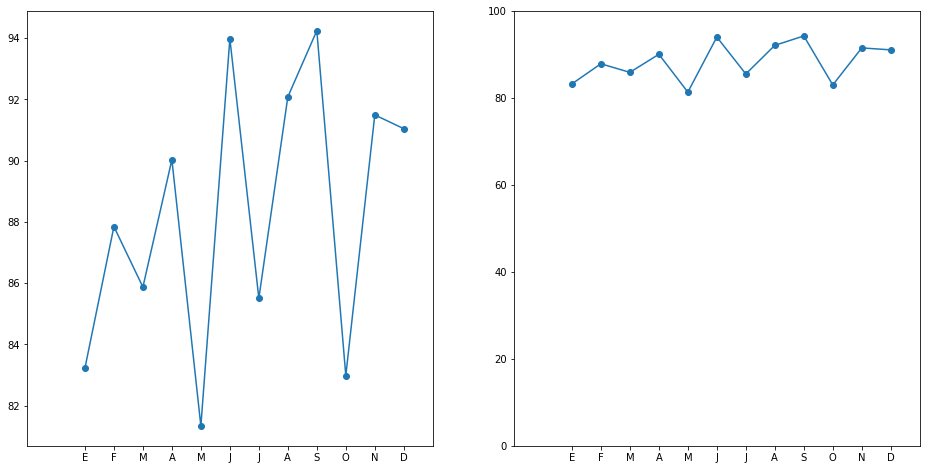

In [62]:
import numpy as np
from matplotlib import pyplot as plt
# Datos
x = range(1,13)
y = 80 + 20*np.random.rand(12)
x_ticks = ["E","F","M","A","M","J","J","A","S","O","N","D"]
fig = plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.plot(x, y,'o-')
plt.xticks(x, x_ticks)
plt.xlim([-1,13])
plt.subplot(1, 2, 2)
plt.plot(x, y,'o-')
plt.xticks(x, x_ticks)
plt.xlim([-1,13])
plt.ylim([0,100])
plt.show()

#### 4. Consistencia
## Utilizar la misma codificación visual entre gráficos similares

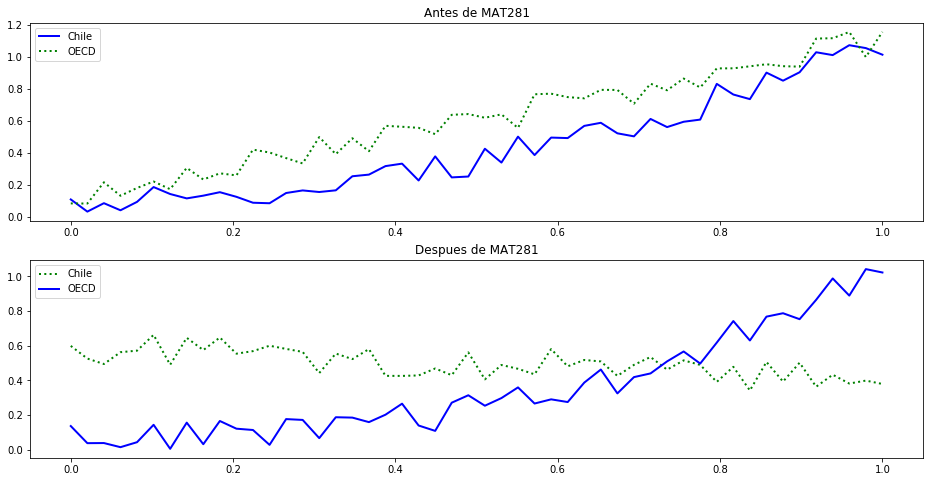

In [65]:
import numpy as np
from matplotlib import pyplot as plt
x = np.linspace(0, 1, 50)
f1 =  x**2+.2*np.random.rand(50)
g1 =  x+.2*np.random.rand(50)
f2 = 0.5-0.2*x+.2*np.random.rand(50)
g2 =x**3+.2*np.random.rand(50)
fig = plt.figure(figsize=(16,8))
plt.subplot(2, 1, 1)
plt.title("Antes de MAT281")
plt.plot(x, f1, 'b', label='Chile', lw=2.0)
plt.plot(x, g1, 'g:', label='OECD', lw=2.0)
plt.legend(loc="upper left")
plt.subplot(2, 1, 2)
plt.title("Despues de MAT281")
plt.plot(x, f2, 'g:', label='Chile', lw=2.0)
plt.plot(x, g2, 'b', label='OECD', lw=2.0)
plt.legend()
plt.show()

## Resumen
Elementos para la creación de una buena visualización
* ***Honestidad***: representaciones visuales no deben engañar al observador.
* ***Priorización***: dato más importante debe utilizar elemento de mejor percepción.
* ***Expresividad***: datos deben utilizar elementos con atribuciones adecuadas.
* ***Consistencia***: codificación visual debe permitir reproducir datos.

El principio básico a respetar es que a partir del gráfico uno debe poder reobtener fácilmente los datos originales.

#### Gráfico a gráfico
## ¿Cuándo utilizar gráfico de barras?

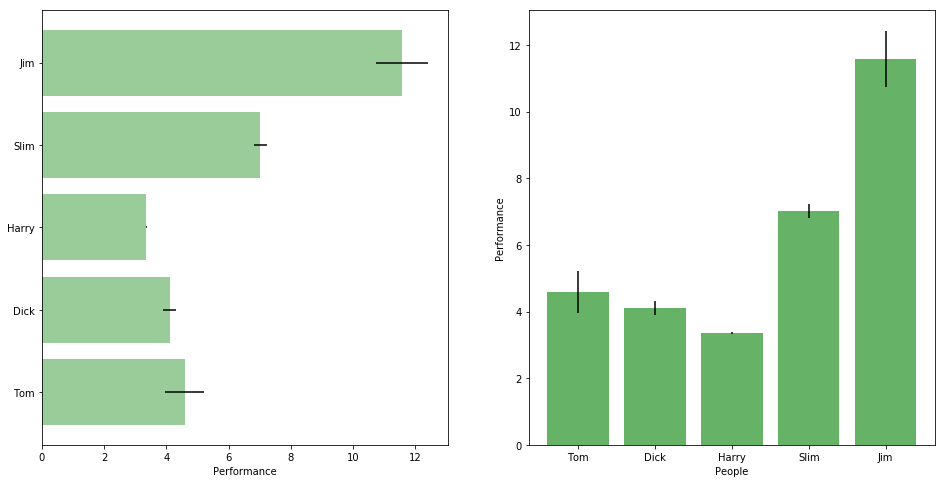

In [66]:
from matplotlib import pyplot as plt
import numpy as np

people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

fig = plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.barh(y_pos, performance, xerr=error, align='center', color="g", alpha=0.4)
plt.yticks(y_pos, people)
plt.xlabel('Performance')
plt.subplot(1,2,2)
plt.bar(y_pos, performance, yerr=error, align='center', color="g", alpha=0.6)
plt.xticks(y_pos, people)
plt.xlabel('People')
plt.ylabel('Performance')
plt.show()

* x: Debe ser datos del tipo nominal o ordinal.
* y: Debe ser datos de tipo ordinal, posicional o cuantitativo.

Evitar: gráfico de nominal vs nominal.

#### Gráfico a gráfico
## ¿Cuándo utilizar gráfico circular?

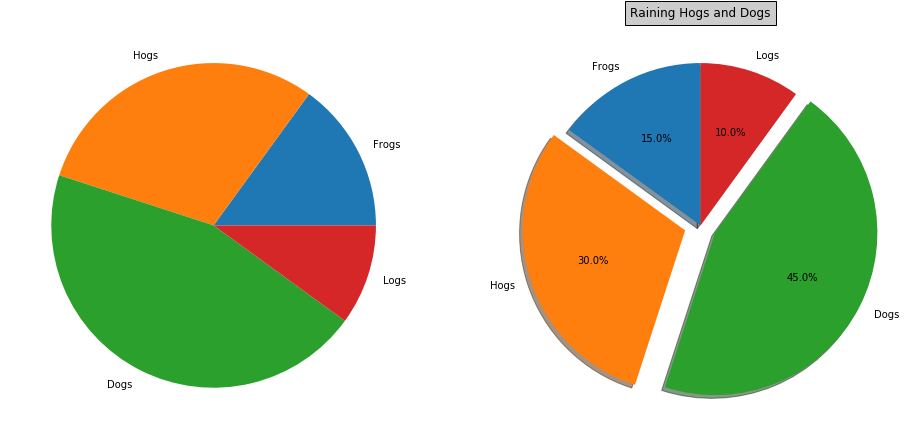

In [67]:
from matplotlib import pyplot as plt

my_labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
my_fracs = [15, 30, 45, 10]
my_explode=(0, 0.10, 0.10, 0)

fig = plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.pie(my_fracs, labels=my_labels)
plt.subplot(1,2,2)
plt.pie(my_fracs, explode=my_explode, labels=my_labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Raining Hogs and Dogs', bbox={'facecolor':'0.8', 'pad':5})
plt.show()

* x: Debe ser datos del tipo nominal o ordinal.
* y: Debe ser datos de tipo ordinal, posicional o cuantitativo.

Evitar: gráfico de nominal vs nominal.

#### Gráfico a gráfico
## ¿Cuándo utilizar campos de vectores?

¿Porqué se llama quiver al campo de vectores en inglés? 

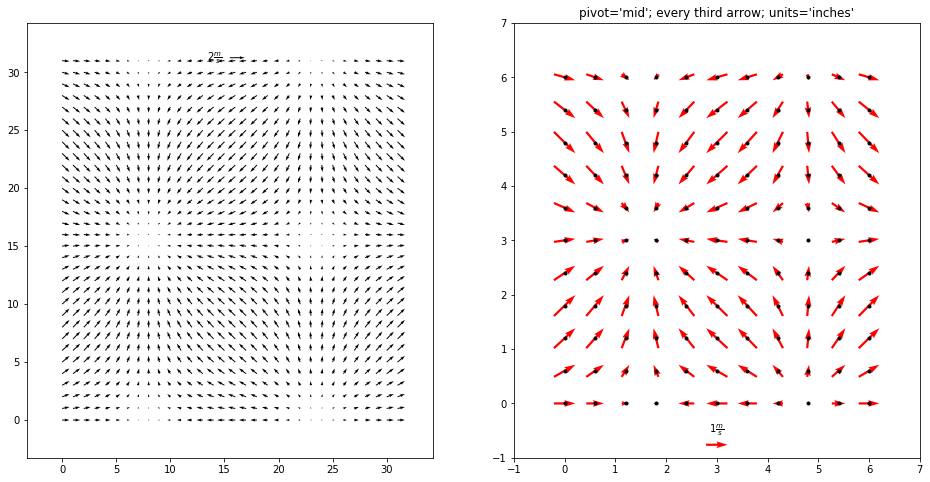

In [68]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma

X, Y = np.meshgrid(np.arange(0, 2 * np.pi, .2), np.arange(0, 2 * np.pi, .2))
U = np.cos(X)
V = np.sin(Y)

fig = plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
Q = plt.quiver(U, V)
qk = plt.quiverkey(Q, 0.5, 0.92, 2, r'$2 \frac{m}{s}$', labelpos='W',
                   fontproperties={'weight': 'bold'})
l, r, b, t = plt.axis()
dx, dy = r - l, t - b
plt.axis([l - 0.05*dx, r + 0.05*dx, b - 0.05*dy, t + 0.05*dy])

plt.subplot(1,2,2)
Q = plt.quiver(X[::3, ::3], Y[::3, ::3], U[::3, ::3], V[::3, ::3],
               pivot='mid', color='r', units='inches')
qk = plt.quiverkey(Q, 0.5, 0.03, 1, r'$1 \frac{m}{s}$',
                   fontproperties={'weight': 'bold'})
plt.plot(X[::3, ::3], Y[::3, ::3], 'k.')
plt.axis([-1, 7, -1, 7])
plt.title("pivot='mid'; every third arrow; units='inches'")

plt.show()

* x: Debe ser datos del tipo posicional o cuantitativo.
* y: Debe ser datos de tipo posicional o cuantitativo. 
* z: Pendiente debe ser dato de tipo posicional o cuantitativo.

Evitar: gráfico de campo de vectores si no es posible la interpretación correspondiente.

#### Gráfico a gráfico
## ¿Cuándo utilizar contour plot?

/home/sebastiandres/miniconda3/envs/mat281_modulo3/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  # This is added back by InteractiveShellApp.init_path()
/home/sebastiandres/miniconda3/envs/mat281_modulo3/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  if sys.path[0] == '':


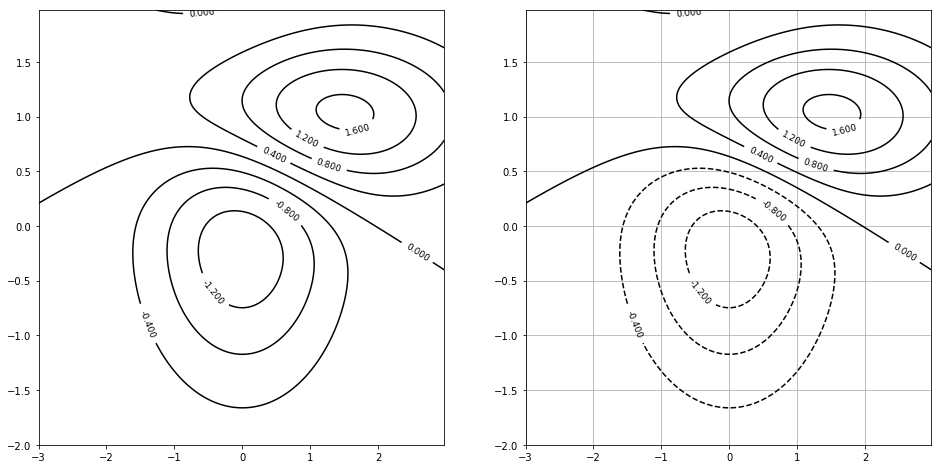

In [69]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
# difference of Gaussians
Z = 10.0 * (Z2 - Z1)

plt.figure(figsize=(16,8))

matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
plt.subplot(1,2,1)
CS = plt.contour(X, Y, Z, 9, colors='k')
plt.clabel(CS, fontsize=9, inline=1)

matplotlib.rcParams['contour.negative_linestyle'] = 'dashed'
plt.subplot(1,2,2)
CS = plt.contour(X, Y, Z, 9, colors='k')
plt.clabel(CS, fontsize=9, inline=1)
plt.grid('on')
# Show
plt.show()

* x: Dato del tipo posicional o cuantitativo.
* y: Dato de tipo posicional o cuantitativo. 
* z: Dto de tipo posicional o cuantitativo.

***OBSERVACION***: Se debe tener suficiente densidad/regularidad de puntos como para poder obtener superficies de nivel.

#### Gráfico a gráfico
## ¿Cuándo utilizar scatter plot?

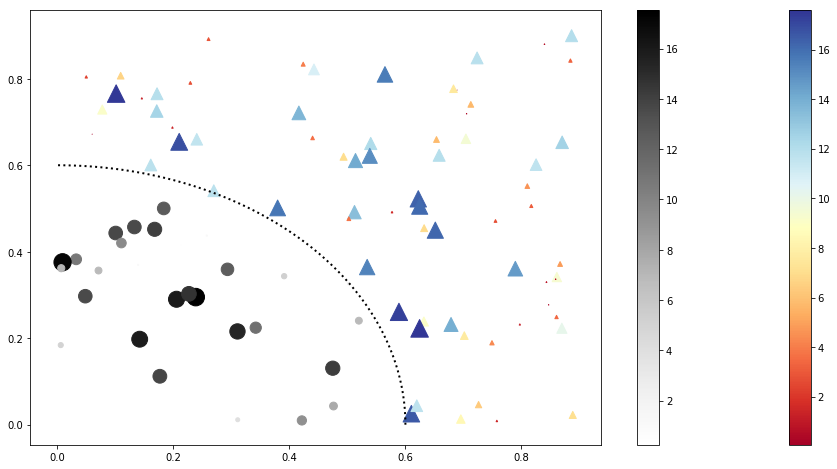

In [70]:
import matplotlib.pyplot as plt
import numpy as np

N = 100
r0 = 0.6
x = 0.9*np.random.rand(N)
y = 0.9*np.random.rand(N)
area = np.pi*(10 * np.random.rand(N))**2  # 0 to 10 point radiuses
c = np.sqrt(area)
r = np.sqrt(x*x + y*y)
cm1 = plt.cm.get_cmap('RdYlBu')
cm2 = plt.cm.get_cmap('Greys')

plt.figure(figsize=(16,8))
area1 = np.ma.masked_where(r < r0, area)
area2 = np.ma.masked_where(r >= r0, area)
sc1 = plt.scatter(x, y, s=area1, marker='^', c=c, cmap=cm1)
plt.colorbar(sc1)
sc2 = plt.scatter(x, y, s=area2, marker='o', c=c, cmap=cm2)
plt.colorbar(sc2)

# Show the boundary between the regions:
theta = np.arange(0, np.pi/2, 0.01)
plt.plot(r0*np.cos(theta), r0*np.sin(theta), "k:", lw=2.0)

plt.show()

* x: Dato del tipo posicional o cuantitativo.
* y: Dato del tipo posicional o cuantitativo. 
* z: Dato del tipo nominal u ordinal. 

***OBSERVACION***: Si hay pocos puntos, también puede usarse para z datos de tipo posicional o cuantitativo.


#### Gráfico a gráfico
## ¿Cuándo utilizar gráfico de barra de error?

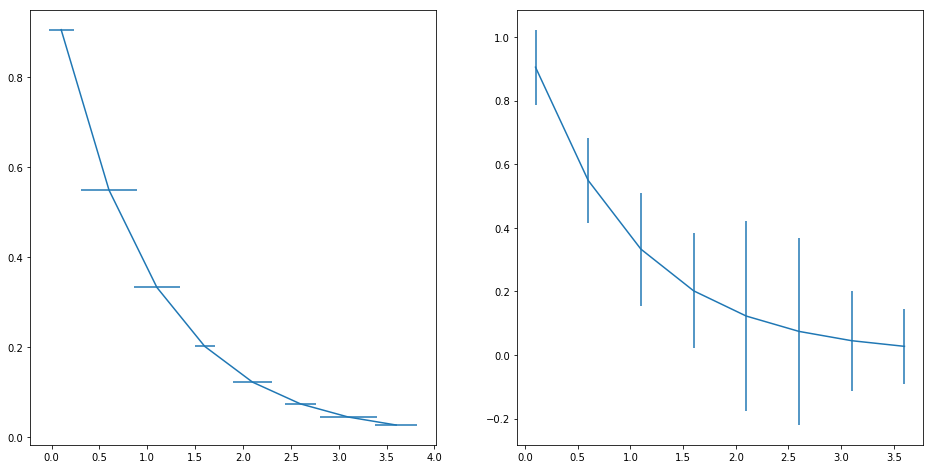

In [71]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
x_error = 0.1 + 0.2*np.random.rand(len(x))
plt.errorbar(x, y, xerr=x_error)

plt.subplot(1,2,2)
y_error = 0.1 + 0.2*np.random.rand(len(x))
plt.errorbar(x, y, yerr=y_error)

plt.show()

* x: Dato del tipo posicional o cuantitativo.
* y: Dato del tipo posicional o cuantitativo. 
* z: Dato del tipo posicional o cuantitativo.
Los valores de z tienen que tener las mismas unidades y.

## Para hacer buenas visualizaciones
* Aprender a reconocer buenos ejemplos y malos ejemplos.
* Para graficos 2d y 3d simples:
  * Libreria clásica: matplotlib (ver ejemplos en http://matplotlib.org/gallery.html)
  * Otras librerías: seaborn, gnuplot, ...
* Para gráficos 3d:
  * Librería clásica: gmsh
  * Otras librerías: mayavi, paraview, ...
* Para gráficos interactivos:
  * altair, bokeh, d3js
  * PowerBI, Tableau, etc.